In [1]:
#example k-z filter

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
#import time series
series = pd.read_csv('/Users/emily/Downloads/co2_mm_mlo.txt',delim_whitespace=True)
print(series.head(20))
#make timestamps
series['m'] = pd.to_datetime(series['m'], format = '%m').dt.strftime('%m')
series['timestamp'] = pd.to_datetime(series['year'].astype(str)  + '-' +series['m'].astype(str), format='%Y-%m')

data = pd.DataFrame()
data['timestamp'] = series['timestamp']
data['monthly_average'] = series['monthly_average']
print(data)
print(data.index)

    year   m    decimal  monthly_average  de-seasonalized  num_days  st_dev  \
0   1958   3  1958.2027           315.70           314.43        -1   -9.99   
1   1958   4  1958.2877           317.45           315.16        -1   -9.99   
2   1958   5  1958.3699           317.51           314.71        -1   -9.99   
3   1958   6  1958.4548           317.24           315.14        -1   -9.99   
4   1958   7  1958.5370           315.86           315.18        -1   -9.99   
5   1958   8  1958.6219           314.93           316.18        -1   -9.99   
6   1958   9  1958.7068           313.20           316.08        -1   -9.99   
7   1958  10  1958.7890           312.43           315.41        -1   -9.99   
8   1958  11  1958.8740           313.33           315.20        -1   -9.99   
9   1958  12  1958.9562           314.67           315.43        -1   -9.99   
10  1959   1  1959.0411           315.58           315.55        -1   -9.99   
11  1959   2  1959.1260           316.48           3

In [146]:
#drop some random rows
import numpy as np

remove_n = 200
drop_indices = np.random.choice(data.index, remove_n, replace=False)
print(drop_indices)
df_subset = data.drop(drop_indices)
print(df_subset.head(50))


[ 39 330 375 624 440 485 616 255 663 729  47 540  16 239 179 153 113 207
 397 755 569 421 198 364 331 772 420 446 286 509 700  19 111  26 342 475
 747 716 339  10 757 235 581 403 401  88 197  75  17 156 267 705 246 507
 576 385 762 457   4 737 295 175 622 219 285 460 240 643 497 531 615 617
 170  14 435 372 444 376 632 472 657 311 593 590 133 666 202 535 635 129
 174 652 733  71 745 454 203 630 720 542 771 735   0 690  87 366 217 244
 505 165 532 367 210 185 258 626 363 427 306 287 201 575 578 259 579 620
 764 124 758 365  24  89 264 455 114 344 456 434 199 530 310 248 322 351
 284  50 309 112 683 383 553 110 148 119 668 731 645 450 458 715 294 559
 780 431 176  37 300 520 356 120 352  92 183  13 463 335 527  22 541 633
 763 270  52 609  85 562   8  98  31 482 546 534 580  77 474 317 761 486
 181 282]
    timestamp  monthly_average
1  1958-04-01           317.45
2  1958-05-01           317.51
3  1958-06-01           317.24
5  1958-08-01           314.93
6  1958-09-01           313.20
7

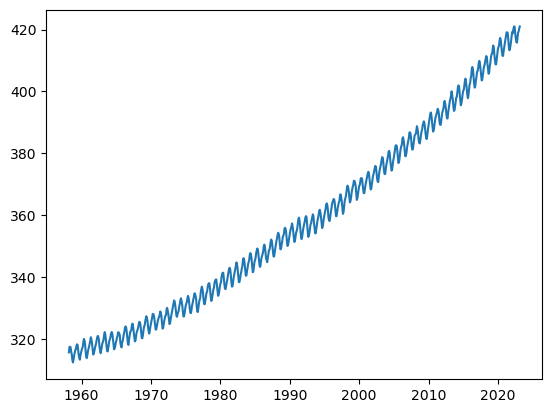

In [35]:
#plot time series
plt.plot(data['timestamp'], data['monthly_average'])
plt.show()

In [152]:
#set window and iterations
window = 3
iterations = 10
'''window is the filter window m in the units of the data (m = 2q+1), in this case, months
iterations is the number of times the moving average is evaluated'''
z = kz_filter(data, 'monthly_average',window,iterations)

In [153]:
print(z)

     timestamp  monthly_average
0   1958-03-01       316.717202
1   1958-04-01       316.622960
2   1958-05-01       316.384910
3   1958-06-01       316.011590
4   1958-07-01       315.545684
..         ...              ...
776 2022-11-01       418.198664
777 2022-12-01       418.591889
778 2023-01-01       419.034557
779 2023-02-01       419.389161
780 2023-03-01       419.549686

[781 rows x 2 columns]


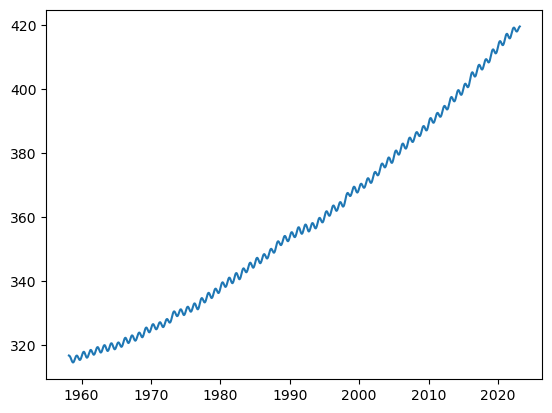

In [154]:
plt.plot(z['timestamp'], z['monthly_average'])
plt.show()

In [80]:
def kz_filter(df, col, window, iterations):
 """KZ filter implementation
    series is a pandas series modified from MONET 
    window is the filter window m in the units of the data (m = 2q+1)
    iterations is the number of times the moving average is evaluated
    """
    df.index = df.timestamp
    z = df.copy()
    for i in range(iterations):
        z.index = z.timestamp
        z = (
            z.rolling(window, center=True, min_periods=1)
            .mean()
            .reset_index()
            .dropna()
        )
    df = df.reset_index(drop=True)
    return z

581


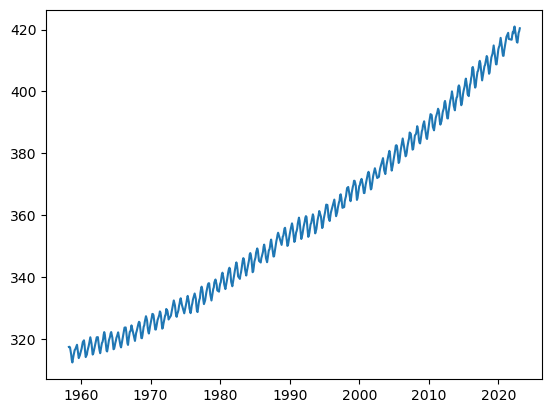

In [147]:
plt.plot(df_subset['timestamp'], df_subset['monthly_average'])
print(len(df_subset))

In [167]:
window = 3
iterations = 5
z = kz_filter(df_subset, 'monthly_average',window,iterations)

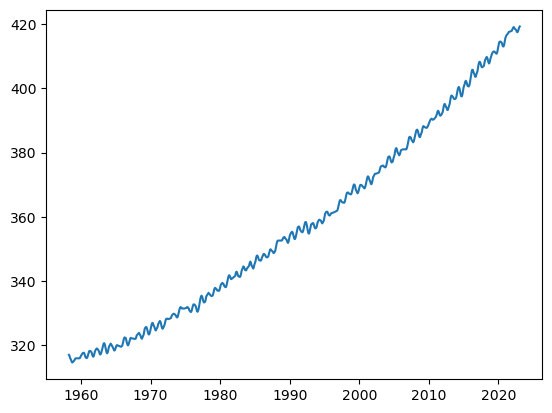

In [168]:
plt.plot(z['timestamp'], z['monthly_average'])
plt.show()